# RATING NLP Project


## Objectius

This project goals are:

* Analyse the given data
* Preprocess the data
* Apply models to predict the rating of a comment.
* Show results

## IMPORTING LIBRARIES

In [46]:
import pandas as pd
import sklearn as sk
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Preprocessing

In [2]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gerardburgues/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gerardburgues/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gerardburgues/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Read File

In [3]:
RawData = pd.read_csv('tripadvisor_hotel_reviews.csv')

### Transformation of data

In [4]:
ReviewData = RawData['Review'].tolist()
ReviewString =  ' '.join(ReviewData)
y = RawData['Rating']


In [12]:
def lowercase(text):
    return text.lower()



In [6]:
def stopWords(text):
    
    stopWords = set(stopwords.words('english'))
    words = word_tokenize(text)
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)

    return ' '.join(wordsFiltered)


In [7]:
def Lemmanize(text):
    Lem = WordNetLemmatizer()
    return Lem.lemmatize(text)


In [8]:
def Stemmer(text):
    ps = PorterStemmer()
    CleanTextString = ps.stem(text)
    return CleanTextString.split()

In [9]:
def CloudWord(text):
    text = ' '.join(text)
    wordcloud = WordCloud(background_color="white",width=1024,height=768).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [13]:
review_list = []
for review in RawData['Review']:
    review = lowercase(review)
    review = stopWords(review)
    review = Lemmanize(review)
    review = Stemmer(review)
    review =' '.join(review)
    review_list.append(review) 


    
    

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


max_features=700 # "number" most common(used) words in reviews

count_vectorizer=CountVectorizer(max_features=max_features) 
# stop words will be dropped by stopwords command

sparce_matrix=count_vectorizer.fit_transform(review_list).toarray()
x_train_counts=count_vectorizer.fit_transform(review_list)
# this code will create matrix that consist of 0 and 1.


In [ ]:
print(len(CleanText))

In [22]:
print(sparce_matrix.shape)

(20491, 700)


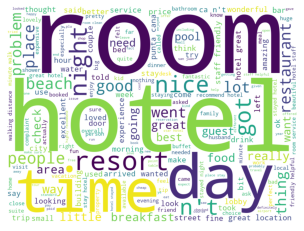

In [23]:
CloudWord(review_list)

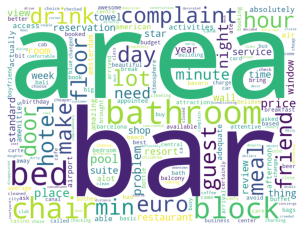

In [21]:
CloudWord(count_vectorizer.get_feature_names())

In [16]:
print("Top {} the most used word by reviewers: {}".format(max_features,count_vectorizer.get_feature_names()))


Top 700 the most used word by reviewers: ['00', '10', '100', '11', '12', '15', '20', '24', '25', '30', '50', 'able', 'absolutely', 'access', 'activities', 'actually', 'adequate', 'afternoon', 'air', 'airport', 'all', 'alot', 'amazing', 'amenities', 'american', 'amsterdam', 'appointed', 'area', 'areas', 'arrival', 'arrived', 'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'attractions', 'available', 'average', 'avoid', 'away', 'awesome', 'bad', 'bags', 'balcony', 'bali', 'bar', 'barcelona', 'bars', 'based', 'basic', 'bath', 'bathroom', 'bathrooms', 'bavaro', 'beach', 'beautiful', 'bed', 'bedroom', 'beds', 'beer', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'block', 'blocks', 'blue', 'book', 'booked', 'booking', 'bother', 'bottle', 'boyfriend', 'break', 'breakfast', 'bring', 'brought', 'budget', 'buffet', 'building', 'bus', 'business', 'busy', 'buy', 'ca', 'cab', 'cafe', 'called', 'came', 'cana', 'canal', 'car', 'card', 'care', 'carte', 'casino', 'center', 'central', 'centre

In [17]:
X=sparce_matrix
print(y)
print(X.shape)

0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64
(20491, 700)


In [18]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("x_train",X_train.shape)
print("x_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (16392, 700)
x_test (4099, 700)
y_train (16392,)
y_test (4099,)


### Model Naive Bayes


In [24]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb2=BernoulliNB()

nb_model=nb.fit(X_train,y_train)
nb2_model=nb2.fit(X_train,y_train)

In [28]:
from sklearn.metrics import accuracy_score, precision_score

y_pred=nb_model.predict(X_test)
y_pred2=nb2_model.predict(X_test)


print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred,average="micro"))
print("**************************************************************")
print("Accuracy_NB2:",accuracy_score(y_test, y_pred2))
print("Precision_NB2:",precision_score(y_test, y_pred2,average="micro"))

Accuracy: 0.4991461332032203
Precision: 0.4991461332032203
**************************************************************
Accuracy_NB2: 0.5174432788484996
Precision_NB2: 0.5174432788484996


# Imagine we do not have the ratings. Let's apply Kmeans to see how many classes would appear

### Model Kmeans

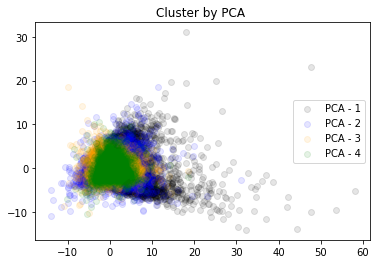

In [65]:
pca = PCA(n_components = 5)
ppca = pca.fit_transform(X)
PCA_components = pd.DataFrame(ppca)
fig, ax = plt.subplots()
plt.scatter(PCA_components[0], PCA_components[1], alpha =.1, color='black', label="PCA - 1")
plt.scatter(PCA_components[1], PCA_components[2], alpha =.1, color='blue', label="PCA - 2")
plt.scatter(PCA_components[2], PCA_components[3], alpha =.1, color='orange', label="PCA - 3")
plt.scatter(PCA_components[3], PCA_components[4], alpha =.1, color='green', label="PCA - 4")
plt.title("Cluster by PCA ")
leg = ax.legend();
plt.show()






Of the PCA components 5 or 10 we can observe that most of the points are in the bottom corner of the graphic. The next step will be to apply KMeans with those components and see how many Ratings would be ideal four our type of DataSet. 1.2.3.4.5 or more.


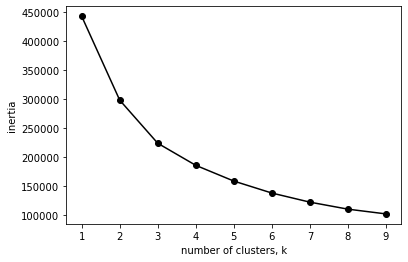

In [49]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
   
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
   
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
   
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

We can observe that the idea number of clusters (stars) would be 2 or three.

We will show what cluster we have when we use 5 K and 3 K. 

In [81]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 3 3 ... 1 3 0]


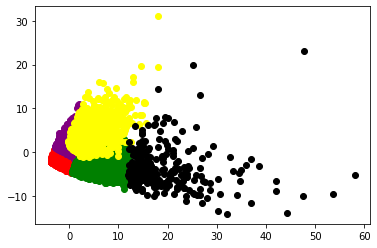

In [82]:
df = ppca
#filter rows of original data
filtered_label1 = df[label == 0]
 
filtered_label2 = df[label == 1]
filtered_label3 = df[label == 2]
filtered_label4 = df[label == 3]
filtered_label5 = df[label == 4]
 
#Plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'purple')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'yellow')
plt.scatter(filtered_label5[:,0] , filtered_label5[:,1] , color = 'black')
plt.show()

In [86]:
 
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 2 2 ... 0 2 0]


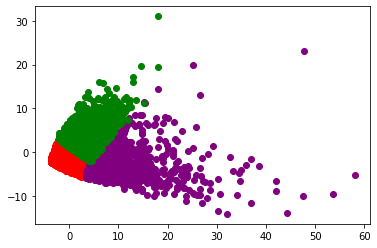

In [87]:
dff = ppca
#filter rows of original data
filtered_label_1 = dff[label == 0]
 
filtered_label_2 = dff[label == 1]
filtered_label_3 = dff[label == 2]

 
#Plotting the results
plt.scatter(filtered_label_1[:,0] , filtered_label_1[:,1] , color = 'red')
plt.scatter(filtered_label_2[:,0] , filtered_label_2[:,1] , color = 'purple')
plt.scatter(filtered_label_3[:,0] , filtered_label_3[:,1] , color = 'green')

plt.show()